# 0. Google Drive Monunt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Install Needed Libraries

In [ ]:
!pip install datasets peft accelerate

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00


# 2. Bring TinyLlama Model

In [ ]:
from transformers import LlamaTokenizer, LlamaForCausalLM

# TinyLlaMA & Tokenizer
tokenizer = LlamaTokenizer.from_pretrained('TinyLlama/TinyLlama_v1.1')
model = LlamaForCausalLM.from_pretrained('TinyLlama/TinyLlama_v1.1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.40G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

# 3. Bring Dataset

### Load dataset

In [ ]:
from datasets import load_dataset

# 'open-korean-instructions' dataset load
dataset = load_dataset('heegyu/open-korean-instructions')

README.md:   0%|          | 0.00/3.15k [00:00<?, ?B/s]

OIG-smallchip2-ko.json:   0%|          | 0.00/106M [00:00<?, ?B/s]

koalpaca.json:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

korquad-chat.json:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

sharegpt_deepl_ko.json:   0%|          | 0.00/611M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/375159 [00:00<?, ? examples/s]

### Print a few information of dataset

In [ ]:
print("1. A Few Samples :")
for i in range(5):
  print(dataset['train'][i]) # First 5 samples
print(dataset['train'][250000]) # 250,000th sample
print(dataset['train'][-1], end= '\n\n') # Last 1 sample

print("2. Column Names :")
print(dataset['train'].column_names, end= '\n\n') # ['source', 'text']

print("3. The Number of Data :")
print(len(dataset['train'])) # 375,159

1. A Few Samples :
{'source': 'OIG-smallchip2-ko', 'text': '<usr> 유언장이 있는 것이 좋다는 말을 들었습니다. 유언장이란 무엇입니까?\n<bot> 유언장은 귀하가 사망한 후 귀하의 재산이 어떻게 분배되어야 하는지를 지정하는 법적 문서입니다. 또한 귀하가 가질 수 있는 자녀나 기타 부양가족을 누가 돌봐야 하는지 명시할 수 있습니다. 유언장에 적용되는 법률이 주마다 다르기 때문에 귀하의 유언장이 유효하고 최신인지 확인하는 것이 중요합니다.'}
{'source': 'OIG-smallchip2-ko', 'text': '<usr> 일자리는 어떻게 찾나요?\n<bot> 직업을 찾는 가장 좋은 방법은 자신의 기술, 경험 및 자격을 강조하는 강력한 이력서와 자기소개서를 작성하는 것입니다. 온라인에서 전문 분야의 채용 공고를 검색하거나 현지 고용주에게 직접 연락하여 채용 가능한 직책에 대해 문의할 수 있습니다. 같은 분야나 업계의 사람들과의 네트워킹도 취업 기회를 찾는 데 도움이 될 수 있습니다.'}
{'source': 'OIG-smallchip2-ko', 'text': '<usr> 돔형 천장, 기둥 및 문이 있는 맨션 내부의 우울한 장면에 대한 상세한 서면 설명을 생성합니다.\n<bot> 원형 모양의 바닥은 완전히 정사각형으로 자른 검은색 대리석으로 만들어졌습니다. 크고 검게 칠해진 대리석 기둥이 벽을 따라 늘어서 있고 머리 위로 높은 돔형 유리 천장으로 끝납니다. 방 저편의 좁은 틈은 그 아래에 미스글린 도금된 문이 있는 탁 트인 계단통으로 이어집니다.'}
{'source': 'OIG-smallchip2-ko', 'text': '<usr> 저는 발목이 삔 상태이고 더 빨리 낫도록 돕기 위해 제가 무엇을 할 수 있는지 알아야 합니다.\n<bot> 붓기와 염증을 줄이는 데 도움이 되는 얼음 요법을 시도해 볼 수 있습니다. 또한 탄력 붕대나 압축 랩을 사용하여 발목을 추가로 지지할 수 있습니다. 제대로 치료할 수 있도록 가능한

### Confirm korean tokenizing simply

In [ ]:
# Using tokenizer
tokenized_input = tokenizer("안녕하세요", truncation=True, max_length=10)

# Confirm results
print(tokenized_input) # confirm if attention_mask is included

# Decoding input_ids
decoded_text = tokenizer.decode(tokenized_input['input_ids'], skip_special_tokens=False)
print(decoded_text)

{'input_ids': [1, 29871, 31734, 238, 136, 152, 30944, 31578, 31527], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
<s> 안녕하세요


# 4. Preprocessing

### Confirm length of sequence
: to decide if using max_length or not

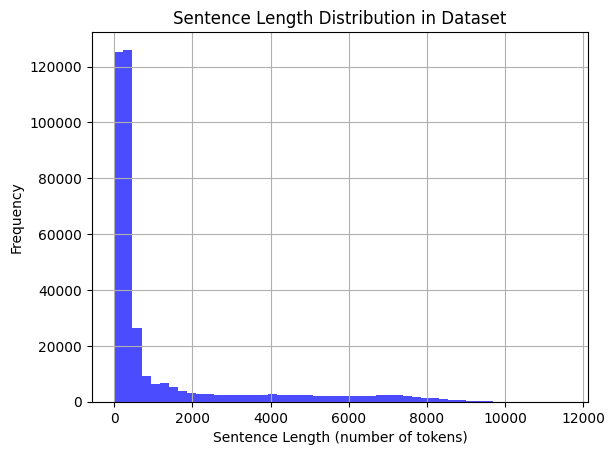

In [ ]:
import matplotlib.pyplot as plt

# Sentence length
sentence_lengths = [len(tokenizer.encode(text['text'])) for text in dataset['train']]

# Draw histogram
plt.hist(sentence_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Sentence Length Distribution in Dataset')
plt.xlabel('Sentence Length (number of tokens)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Statistical info
mean_length = np.mean(sentence_lengths)
median_length = np.median(sentence_lengths)
percentile_90 = np.percentile(sentence_lengths, 90)
percentile_95 = np.percentile(sentence_lengths, 95)

print(f"Mean Sentence Length: {mean_length}")
print(f"Median Sentence Length: {median_length}")
print(f"90th Percentile Sentence Length: {percentile_90}")
print(f"95th Percentile Sentence Length: {percentile_95}")

Mean Sentence Length: 1189.2096364474796
Median Sentence Length: 327.0
90th Percentile Sentence Length: 4455.0
95th Percentile Sentence Length: 6423.0


### Defining ```preprocess_function```

In [ ]:
import re

# Define preprocessing function
def preprocess_function(examples):
    text = examples['text']

    # if <sys> is included, preprocess them(ex. idx= 284461)
    if '<sys>' in text:
        sys_text = re.search(r'<sys>(.*)', text).group(1).strip()
        tokenized_sys_text = tokenizer(sys_text, truncation=True, max_length=512)

        return {
            'input_ids': tokenized_sys_text['input_ids'],
            'attention_mask': tokenized_sys_text['attention_mask'],
            'labels': tokenized_sys_text['input_ids']  # same with 'input_ids'
        }

    # Divide Question-Answer
    user_match = re.search(r'<usr> (.*?)\n', text)
    bot_match = re.search(r'<bot> (.*)', text)

    # Extract user input and bot output without tags
    user_input = user_match.group(1).strip() if user_match else ""
    bot_output = bot_match.group(1).strip() if bot_match else ""

    # Tokenizing input and label
    tokenized_input = tokenizer(user_input, truncation=True, max_length=512)
    tokenized_label = tokenizer(bot_output, truncation=True, max_length=512).input_ids

    return {
        'input_ids': tokenized_input['input_ids'],
        'attention_mask': tokenized_input['attention_mask'],
        'labels': tokenized_label
    }

# Apply preprocessing
tokenized_dataset = dataset['train'].map(preprocess_function, batched=False)

Map:   0%|          | 0/375159 [00:00<?, ? examples/s]

### Save tokenized_dataset in drive

In [ ]:
tokenized_dataset.save_to_disk("/content/drive/MyDrive/Colab Notebooks/tinyLlama_task/dataset")

### Bring saved tokenized_dataset

In [ ]:
from datasets import load_from_disk

tokenized_dataset = load_from_disk("/content/drive/MyDrive/Colab Notebooks/tinyLlama_task/dataset")

# 5. PEFT

### Print name of modules of model
: to confirm the name of parameter, ```target_moduls```

In [ ]:
for name, module in model.named_modules():
    print(name)


model
model.embed_tokens
model.layers
model.layers.0
model.layers.0.self_attn
model.layers.0.self_attn.q_proj
model.layers.0.self_attn.k_proj
model.layers.0.self_attn.v_proj
model.layers.0.self_attn.o_proj
model.layers.0.self_attn.rotary_emb
model.layers.0.mlp
model.layers.0.mlp.gate_proj
model.layers.0.mlp.up_proj
model.layers.0.mlp.down_proj
model.layers.0.mlp.act_fn
model.layers.0.input_layernorm
model.layers.0.post_attention_layernorm
model.layers.1
model.layers.1.self_attn
model.layers.1.self_attn.q_proj
model.layers.1.self_attn.k_proj
model.layers.1.self_attn.v_proj
model.layers.1.self_attn.o_proj
model.layers.1.self_attn.rotary_emb
model.layers.1.mlp
model.layers.1.mlp.gate_proj
model.layers.1.mlp.up_proj
model.layers.1.mlp.down_proj
model.layers.1.mlp.act_fn
model.layers.1.input_layernorm
model.layers.1.post_attention_layernorm
model.layers.2
model.layers.2.self_attn
model.layers.2.self_attn.q_proj
model.layers.2.self_attn.k_proj
model.layers.2.self_attn.v_proj
model.layers.2.

### Set LoRA & apply to model

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType

peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    r=16,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=[
        "self_attn.q_proj",
        "self_attn.v_proj",
        "mlp.gate_proj",
        "mlp.up_proj",
        "mlp.down_proj"
    ]
)

model = get_peft_model(model, peft_config)

# 6. Train

### Divide train-test data

In [ ]:
# Train:Test = 80:20
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)

train_dataset = train_test_split['train']
validation_dataset = train_test_split['test']

### To use gradient checkpointing

In [ ]:
for param in model.parameters():
    param.requires_grad = True

### ```CustomDynamicPaddingCollator```

In [ ]:
# Set individual padding token : Llama doesn't have padding tokens.
tokenizer.pad_token_id = 0
model.config.pad_token_id = 0

import torch
from transformers import PreTrainedTokenizerBase, DataCollatorForSeq2Seq

class CustomDynamicPaddingCollator(DataCollatorForSeq2Seq):
    def __init__(self, tokenizer: PreTrainedTokenizerBase, label_pad_token_id: int = -100):
        super().__init__(tokenizer, padding=True, label_pad_token_id=label_pad_token_id)
        self.tokenizer = tokenizer
        self.label_pad_token_id = label_pad_token_id

    def __call__(self, batch):
        input_ids = []
        attention_mask = []
        labels = []

        # 1. Extract input_ids & labels from each sample
        input_ids_list = [sample["input_ids"] for sample in batch]
        labels_list = [sample["labels"] for sample in batch]

        # 2. Find the longest sequence length in batch
        max_input_length = max(len(input_ids) for input_ids in input_ids_list)
        max_label_length = max(len(labels) for labels in labels_list)

        # 3. Padding input_ids & label (standard: batch)
        padded_input_ids = [
            input_ids + [self.tokenizer.pad_token_id] * (max_input_length - len(input_ids))
            for input_ids in input_ids_list
        ]
        padded_labels = [
            labels + [self.label_pad_token_id] * (max_label_length - len(labels))
            for labels in labels_list
        ]

        # 4. Set the <user> part(input_ids) as -100 to ignore when calculating loss
        for i in range(len(batch)): # 0 1 2 3
            padded_question = padded_input_ids[i] + [self.tokenizer.pad_token_id] * (len(padded_labels[i]))
            padded_answer = [self.label_pad_token_id] * (len(padded_input_ids[i])) + padded_labels[i]

            input_ids_i = input_ids.append(padded_question)
            labels_i = labels.append(padded_answer)
            attention_mask_i = attention_mask.append(padded_question != self.tokenizer.pad_token_id)

            return {
                "input_ids": torch.tensor(input_ids, dtype=torch.long),
                "attention_mask": torch.tensor(attention_mask, dtype=torch.long),
                "labels": torch.tensor(labels, dtype=torch.long),
            }

data_collator = CustomDynamicPaddingCollator(tokenizer=tokenizer)

### ```Compute_metrics```

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    predictions, labels = pred
    predictions = np.argmax(predictions, axis=1)
    accuracy = np.sum(predictions == labels) / len(labels)
    return {"accuracy": accuracy}

### ```CustomLossTrainer```

In [ ]:
import torch.nn.functional as F
from transformers import Trainer

class CustomLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        # 1. Flatten input_ids & labels (1D list)
        inputs = {k: v.to(self.args.device) for k, v in inputs.items()}

        # 2. logits
        outputs = model(**inputs)
        logits = outputs.logits  # [batch_size, seq_length_logits, vocab_size]

        # 3. labels
        labels = inputs["labels"]  # [batch_size, seq_length_labels]

        # Confirm length inconsistency
        if logits.size(1) != labels.size(1):
            print("LENGTH INCONSISTENCY")

        # 4. Padding based on the longer sequence (among logit & labels)
        max_len = max(logits.size(1), labels.size(1))
        padded_logits = torch.zeros(
            logits.size(0), max_len, logits.size(2), device=logits.device
        )
        padded_logits[:, :logits.size(1), :] = logits

        padded_labels = torch.full(
            (labels.size(0), max_len), -100, dtype=labels.dtype, device=labels.device
        )
        padded_labels[:, :labels.size(1)] = labels

        # Loss
        loss = F.cross_entropy(
            padded_logits.view(-1, padded_logits.size(-1)),  # [batch_size * seq_length, vocab_size]
            padded_labels.view(-1),  # [batch_size * seq_length]
            ignore_index=-100
        )

        if return_outputs:
            return loss, outputs
        else:
            return loss

### Train Setting

In [ ]:
from transformers import Trainer, TrainingArguments

training_arguments = TrainingArguments(
  gradient_accumulation_steps=4, # gradient_accumulation_steps
  fp16=True,  # Activate Mixed precision
  output_dir="/content/drive/MyDrive/Colab Notebooks/tinyLlama_task/results",
	evaluation_strategy="steps",
	logging_strategy="steps",
	logging_steps=500,
	num_train_epochs=3,
	per_device_train_batch_size=2,
	per_device_eval_batch_size=2,
	learning_rate=2e-5,
	load_best_model_at_end=True,
	save_strategy="steps",
  save_steps=500,
  save_total_limit=2,
  overwrite_output_dir=True,
	metric_for_best_model="accuracy",
)

trainer = CustomLossTrainer(
	model=model,
	train_dataset=train_dataset,
	data_collator=data_collator,
	eval_dataset=validation_dataset,
	args=training_arguments,
	compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


### Add callback to trainer

In [ ]:
from transformers import TrainerCallback

class LoggingCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        print(f"Step: {state.global_step}, Loss: {logs.get('loss', 'N/A')}, Accuracy: {logs.get('eval_accuracy', 'N/A')}")
        print(f"Steps completed: {state.global_step}/{state.max_steps}")

trainer.add_callback(LoggingCallback)

### Training

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [ ]:
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()

In [ ]:
import time

start_time = time.time()

trainer.train()
trainer.save_model("/content/drive/MyDrive/Colab Notebooks/tinyLlama_task/results/manual_checkpoint")

end_time = time.time()

training_time = end_time - start_time
training_time_minutes = training_time / 60

print(f"Total training time: {training_time_minutes:.2f} minutes")

trainer.save_model("/content/drive/MyDrive/Colab Notebooks/tinyLlama_task/best_model")

Step,Training Loss,Validation Loss


We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


Step: 500, Loss: 9.9196, Accuracy: N/A
Steps completed: 500/112548


OutOfMemoryError: CUDA out of memory. Tried to allocate 9.52 GiB. GPU 0 has a total capacity of 39.56 GiB of which 9.36 GiB is free. Process 8197 has 30.20 GiB memory in use. Of the allocated memory 21.85 GiB is allocated by PyTorch, and 7.84 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# 7. Testing model

In [ ]:
import torch
from transformers import LlamaTokenizer, LlamaForCausalLM
from peft import PeftModel

# 1. Checkpoint & Basic model path
base_model_path = "TinyLlama/TinyLlama_v1.1"
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/tinyLlama_task/best_model" # best model

# 2. Tokenizer & Original model
tokenizer = LlamaTokenizer.from_pretrained(base_model_path)
model = LlamaForCausalLM.from_pretrained(base_model_path)

# 3. Load PEFT weight
model = PeftModel.from_pretrained(model, checkpoint_path)

# 4. Device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# 5. Input for test
test_input = "비 오는 날 먹기 좋은 음식은?"
inputs = tokenizer(test_input, return_tensors="pt").to(device)

# 7. Precision
with torch.no_grad():
    output = model.generate(
        **inputs,
        max_length=128,
        num_return_sequences=1,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
    )

# 8. Decoding result
result = tokenizer.decode(output[0], skip_special_tokens=True)
print("모델 응답:", result)

In [ ]:
result = tokenizer.decode(output[0], skip_special_tokens=True)
print("모델 응답:", result)